In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from molmap.feature.pdb.pdb2fmap import PDB2Fmap

RDKit WARNING: [12:43:17] Enabling RDKit 2019.09.2 jupyter extensions


## transofrm self properties

2021-07-21 12:43:19,682 - INFO - [bidd-molmap] - Calculating distance ...
2021-07-21 12:43:19,805 - INFO - [bidd-molmap] - the number of process is 16


100%|##########| 1596/1596 [00:01<00:00, 1302.74it/s]


2021-07-21 12:44:21,326 - INFO - [bidd-molmap] - applying hierarchical clustering to obtain group information ...
UMAP(metric='precomputed', random_state=32, verbose=2)
Construct fuzzy simplicial set
Wed Jul 21 12:44:21 2021 Finding Nearest Neighbors
Wed Jul 21 12:44:21 2021 Finished Nearest Neighbor Search
Wed Jul 21 12:44:23 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Jul 21 12:44:26 2021 Finished embedding
2021-07-21 12:44:26,829 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-07-21 12:44:29,473 - INFO - [bidd-molmap] - Finished


100%|##########| 6/6 [00:00<00:00, 5922.76it/s]


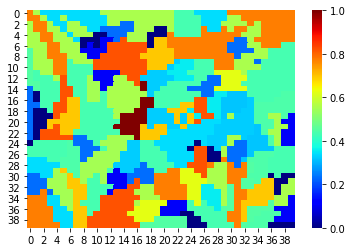

In [2]:
pm = PDB2Fmap(embd_grain='all', fmap_shape=None)
pm.fit(pdb_file='./1a1e/1a1e_protein.pdb', embd_chain='B')
X = pm.transform_xyz(scale=True, feature_range=(0.1,1))
X = pm.transofrm_bf(scale = True, feature_range=(0.2,1))
X = pm.transofrm_pkt('./1a1e/1a1e_pocket.pdb')
X = pm.transform_intrinsic()
sns.heatmap(X[2].reshape(*pm.fmap_shape), cmap = 'jet')

## transofrm custom indexes

In [3]:
from molmap.feature.sequence.aas.local_feature.aai import load_index
aaidx = load_index()
dfindex = aaidx.data
X = pm.transform_custom(dfindex.T)

100%|##########| 566/566 [00:00<00:00, 677.79it/s]


In [4]:
X.shape

(566, 40, 40, 1)

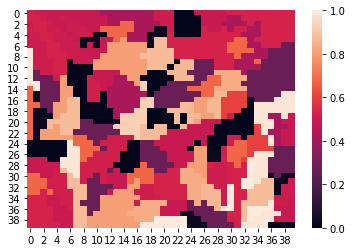

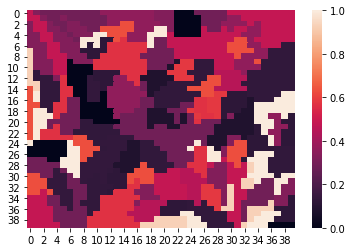

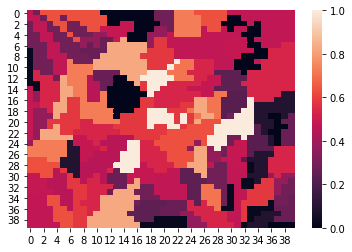

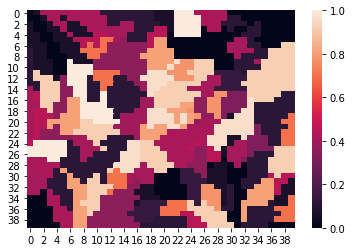

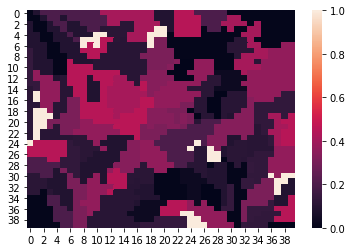

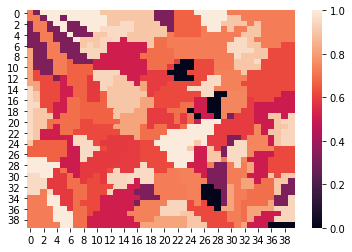

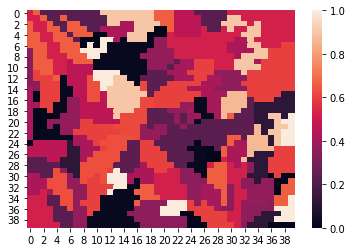

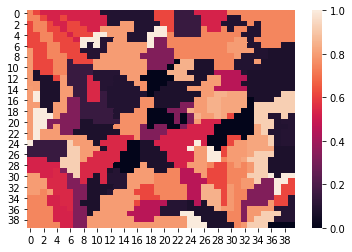

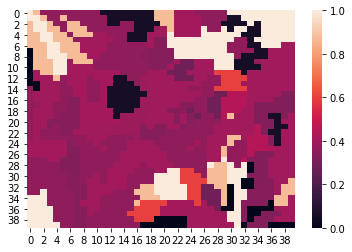

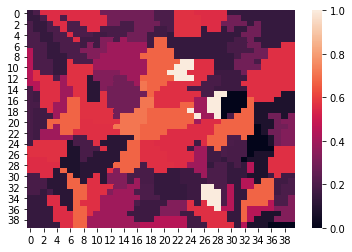

In [5]:
for i in range(0, 500, 50):
    fig, ax = plt.subplots()
    sns.heatmap(X[i].reshape(*pm.fmap_shape),  ax=ax)